### Analysis and Plotting of Differential Scanning Calorimetry (DSC), Thermogravimetric Analaysis (TGA), and Differential Thermal Analysis (DTA) Plots of Commercial Polyurethane Foam

### Part 2 - TGA and DTA Plots

* * *
*Code written by Francis Sanguyo*

*Start Date: February 2, 2026*

*End Date: February 7, 2026*

*Description:*

This program plots and analyzes instrument data from Shimadzu DSC-60 Series and Shimadzu DTG-60A Series regarding the thermal properties of commercial polyurethane (PU) foam samples. These plots include DSC, TGA, and DTA, respectively.

* * *
### Script Outline
1. Preliminaries: import packages, assign data file links, sample names, and sample masses
2. Create dataframes for each DSC file for each PU sample
3. Plot trends between temperature and mass percentage (%) remaining for TGA with filter applied
4. Plot trends between time and mass percentage (%) remaining for TGA with filter applied
5. Highlight regions of degradation or mass loss and inflection points during degradation
6. Plot trends between temperature and DTA signal in uV with filter applied
7. Plot trends between time and DTA signal in uV with filter applied
8. Highlight local minima in the DTA signal, then integrate into the plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks, savgol_filter

In [2]:
ROOT_DIR = os.getcwd()
path_DSC_PUSample1 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample1.txt"
path_DSC_PUSample2 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample2.txt"
path_DSC_PUSample3 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample3.txt"
path_TGA_DTA_PUSample1 = ROOT_DIR + "/TGA & DTA Data Files" + "/TGA&DTA_PU_Sample1.txt"
path_TGA_DTA_PUSample2 = ROOT_DIR + "/TGA & DTA Data Files" + "/TGA&DTA_PU_Sample2.txt"

print(f"Obtained Root Directory: \n {ROOT_DIR}")

Obtained Root Directory: 
 /Users/francismiguelj.sanguyo/Documents/Personal School Documents/Year 4 Senior (ADMU)/Year 4 Sem 2 (Jan-Apr 2025)/MATSE 121.02 LAB (LAB2-VX) - Polymers, Polymeric Materials, Laboratory/Analysis and Plotting of DSC, TGA, and DTA


In [3]:
DF_TGA_DTA_PUSample1 = pd.read_csv(path_TGA_DTA_PUSample1, sep="\\s+")
DF_TGA_DTA_PUSample2 = pd.read_csv(path_TGA_DTA_PUSample2, sep="\\s+")
## Note that \\s+ is a regular expression used for detecting one or more white spaces

# Check data frames for Sample 1 to check that they have been converted correctly
print(DF_TGA_DTA_PUSample1)

# Compile data frames into a single list
DFList_TGA_DTA_PUSamples_Uncleaned = [DF_TGA_DTA_PUSample1, DF_TGA_DTA_PUSample2]

# Get the masses of each PU foam sample
sample_masses_mg = [1.606, 2.178]

      Time(sec)     Temp(C)    DTA(uV)   TGA(mg)
0           0.0   28.358500  -0.534000  1.640202
1           1.0   28.510300  -0.530000  1.642300
2           2.0   28.521200  -0.527000  1.645802
3           3.0   28.388899  -0.523000  1.652000
4           4.0   28.593300  -0.518000  1.658699
...         ...         ...        ...       ...
5397     5397.0  901.057007 -16.207001 -0.391899
5398     5398.0  901.244995 -16.240002 -0.392097
5399     5399.0  901.333801 -16.267000 -0.391998
5400     5400.0  901.570007 -16.290001 -0.392399
5401     5401.0  901.782471 -16.304001 -0.392200

[5402 rows x 4 columns]


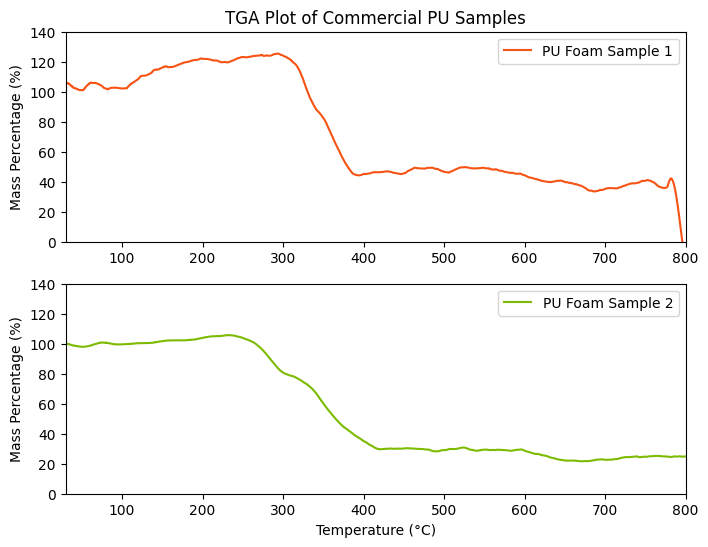

In [4]:
# Plot temperature versus remaining mass percentage with Savitzky-Golay Filter to smooth signal
figure, axis = plt.subplots(2, 1, figsize=(8, 6))

# Set colors for the DSC signal
colors = ["#f65314", "#7cbb00"]

# Set parameters for the Savitzky-Golay filter
param_savgol_windowSize = 200
param_savgol_polyOrder = 3

index = 0
for DF_TGA_DTA in DFList_TGA_DTA_PUSamples_Uncleaned:
    # Get data values for X and Y axes
    X_Temperature = DF_TGA_DTA["Temp(C)"]
    massPercentage = DF_TGA_DTA["TGA(mg)"] / sample_masses_mg[index] * 100
    smoothMassPercentage = savgol_filter(DF_TGA_DTA["TGA(mg)"] / sample_masses_mg[index] * 100, param_savgol_windowSize, param_savgol_polyOrder)
    Y_MassPercentage = smoothMassPercentage

    # Plot X and Y Axes
    axis[index].plot(X_Temperature, Y_MassPercentage, label=f"PU Foam Sample {index+1}", color=colors[index])
    axis[index].set(ylabel="Mass Percentage (%)")
    axis[index].legend(loc="upper right")

    # Set limits on the X and Y axes
    axis[index].set_ylim(0, 140)
    axis[index].set_xlim(30, 800)

    if index == 0:
        axis[index].set_title("TGA Plot of Commercial PU Samples")
    if index == len(DFList_TGA_DTA_PUSamples_Uncleaned) -1:
        axis[index].set(xlabel="Temperature (°C)")
    index += 1


In [5]:
# For PU Foam Sample 1:
# Range 1 - 293.7 C to 347.1 C (visually determined)
# Range 2 - 347.1 C to 391.4 C (visually determined)

# For PU Foam Sample 2:
# Range 1 - 234.8 C to 305.0 C (visually determined)
# Range 2 - 305.0 C to 418.6 C (visually determined)

sample1_T1 = 293.7
sample1_T2 = 347.1
sample1_T3 = 391.4
sample2_T1 = 234.8
sample2_T2 = 305.0
sample2_T3 = 418.6

# Get list of key temperatures for degradation events in TGA
sample1_TempList = [sample1_T1, sample1_T2, sample1_T3]
sample2_TempList = [sample2_T1, sample2_T2, sample2_T3]

samples_TempList = [sample1_TempList, sample2_TempList]

# Set parameters for the Savitzky-Golay filter
param_savgol_windowSize = 200
param_savgol_polyOrder = 3

# Get the mass percent at each key temperature via linear interpolation
samples_MassPercents = []
samples_RMSNoise = []
index = 0
for DF_TGA_DTA, sampleI_TempList in zip(DFList_TGA_DTA_PUSamples_Uncleaned, samples_TempList):
    # Get data values for X and Y axes
    X_Temperature = DF_TGA_DTA["Temp(C)"]
    massPercentage = DF_TGA_DTA["TGA(mg)"] / sample_masses_mg[index] * 100
    smoothMassPercentage = savgol_filter(DF_TGA_DTA["TGA(mg)"] / sample_masses_mg[index] * 100, param_savgol_windowSize, param_savgol_polyOrder)
    Y_MassPercentage = smoothMassPercentage

    # Then use linear interpolation to estimate the mass percent at each key temperature
    keyMassPercents = [float(xValue) for xValue in np.interp(sampleI_TempList, X_Temperature, Y_MassPercentage)]
    samples_MassPercents.append(keyMassPercents)

    # Calculate the noise of the signal (in % mass) based on the interpolation
    RMSNoise = float(np.sqrt(np.sum((smoothMassPercentage-massPercentage)**2)/len(smoothMassPercentage)))
    samples_RMSNoise.append(RMSNoise)
    index += 1

# Take the difference in the mass percents, and report the mass difference
drops_TempRange = []
drops_MassPercentDifferences = []
drops_RMSNoise = []
drops_SampleNumber = []

index = 0
for sampleI_TempList, massPercents, RMSNoise in zip(samples_TempList, samples_MassPercents, samples_RMSNoise):
    drops_TempRange.append(f"{sampleI_TempList[0]}-{sampleI_TempList[-1]}")
    massPercentDifferences = [-(massPercents[i+1] - massPercents[i]) for i in range(len(massPercents)-1)]
    tempRanges = [f"{sampleI_TempList[i]}-{sampleI_TempList[i+1]}" for i in range(len(massPercents)-2)]
    drops_TempRange.extend(tempRanges)
    drops_MassPercentDifferences.extend(massPercentDifferences)
    for i in range(len(massPercentDifferences)):
        drops_RMSNoise.append(RMSNoise)
        drops_SampleNumber.append(index+1)
    index += 1


print(drops_TempRange, drops_MassPercentDifferences, drops_RMSNoise, drops_SampleNumber)

# Summarize drops as a single dataframe
DF_TGADrops = pd.DataFrame({
    "Sample Number": drops_SampleNumber,
    "Temperature Range (°C)": drops_TempRange,
    "Mass % Difference (%)": drops_MassPercentDifferences,
    "RMS Noise (%)": drops_RMSNoise,
})
print(DF_TGADrops)

['293.7-391.4', '293.7-347.1', '234.8-418.6', '234.8-305.0'] [40.778740873226425, 40.1727085365153, 26.145887203179683, 49.83221797746599] [2.4750450606253347, 2.4750450606253347, 0.8555484586169783, 0.8555484586169783] [1, 1, 2, 2]
   Sample Number Temperature Range (°C)  Mass % Difference (%)  RMS Noise (%)
0              1            293.7-391.4              40.778741       2.475045
1              1            293.7-347.1              40.172709       2.475045
2              2            234.8-418.6              26.145887       0.855548
3              2            234.8-305.0              49.832218       0.855548


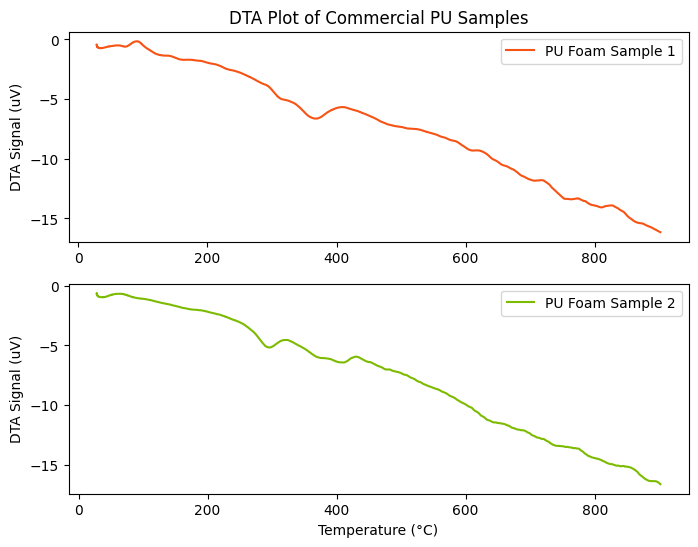

In [21]:
# Plot temperature versus DTA signal in uV
figure, axis = plt.subplots(2, 1, figsize=(8, 6))

# Set colors for the DSC signal
colors = ["#f65314", "#7cbb00"]

# Set parameters for the Savitzky-Golay filter
param_savgol_windowSize = 200
param_savgol_polyOrder = 3

index = 0
for DF_TGA_DTA in DFList_TGA_DTA_PUSamples_Uncleaned:
    # Get data values for X and Y axes
    X_Temperature = DF_TGA_DTA["Temp(C)"]
    DTA_Signal = DF_TGA_DTA["DTA(uV)"]
    smoothDTA_Signal = savgol_filter(DTA_Signal, param_savgol_windowSize, param_savgol_polyOrder)
    Y_DTA_Signal = smoothDTA_Signal

    # Plot X and Y Axes
    axis[index].plot(X_Temperature, Y_DTA_Signal, color=colors[index], label=f"PU Foam Sample {index+1}")
    axis[index].set(ylabel="DTA Signal (uV)")
    axis[index].legend(loc="upper right")

    if index == 0:
        axis[index].set_title("DTA Plot of Commercial PU Samples")
    if index == len(DFList_TGA_DTA_PUSamples_Uncleaned) -1:
        axis[index].set(xlabel="Temperature (°C)")
    index += 1

In [25]:
# Get local maxima and minima in the DTA plot

# Create list to summarize temperatures with minima and maxima
list_DTAPeaks_tempMinima = []
list_DTAPeaks_sampleMinima = []
list_DTAPeaks_tempMaxima = []
list_DTAPeaks_sampleMaxima = []

# Set parameters for finding DSC minima
param_peakDistance = 20
param_prominence = 0.6  # Manually picked via trial and error

index = 0
for DF_TGA_DTA in DFList_TGA_DTA_PUSamples_Uncleaned:
    # Find local minima
    DTAMinima_indices, misc_peakOutput = find_peaks(-DF_TGA_DTA["DTA(uV)"],
                                                    distance=param_peakDistance,
                                                   height=(None, None),
                                                   prominence=param_prominence)

    # Find local maxima
    DTAMaxima_indices, misc_peakOutput = find_peaks(DF_TGA_DTA["DTA(uV)"],
                                                    distance=param_peakDistance,
                                                   height=(None, None),
                                                   prominence=param_prominence)
    # Get corresponding temperatures of maxima and minima in order
    DTAMinima_temps= list(np.take(np.array(DF_TGA_DTA["Temp(C)"]), DTAMinima_indices))
    DTAMaxima_temps= list(np.take(np.array(DF_TGA_DTA["Temp(C)"]), DTAMaxima_indices))

    DTAMinima_samples = [index+1 for i in range(len(DTAMinima_temps))]
    DTAMaxima_samples = [index+1 for i in range(len(DTAMaxima_temps))]

    # Summarize onto the lists
    list_DTAPeaks_tempMinima.extend(DTAMinima_temps)
    list_DTAPeaks_sampleMinima.extend(DTAMinima_samples)
    list_DTAPeaks_tempMaxima.extend(DTAMaxima_temps)
    list_DTAPeaks_sampleMaxima.extend(DTAMaxima_samples)

    index += 1

# Summarize peaks as a data frame
DF_DTAMinima = pd.DataFrame({
    "Sample Number": list_DTAPeaks_sampleMinima,
    "Temperature of Minima (°C)": list_DTAPeaks_tempMinima
})
DF_DTAMaxima = pd.DataFrame({
    "Sample Number": list_DTAPeaks_sampleMaxima,
    "Temperature of Maxima (°C)": list_DTAPeaks_tempMaxima
})

print(f"Table of Detected Minima: \n{DF_DTAMinima}\n")
print(f"Table of Detected Maxima: \n{DF_DTAMaxima}\n")


Table of Detected Minima: 
   Sample Number  Temperature of Minima (°C)
0              1                  367.319977
1              1                  770.454285
2              2                  297.486389
3              2                  406.067291

Table of Detected Maxima: 
   Sample Number  Temperature of Maxima (°C)
0              1                   88.359795
1              1                  405.826202
2              1                  780.624207
3              2                  316.153778
4              2                  431.605499

